In [ ]:
#PROJECT ON CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING                      PREPARED BY SHILPI PARIKH 

In [ ]:
#Import all important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
#EDA on the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.drop(["CustomerID"], axis = 1, inplace = True)

In [ ]:
# Visualization of Dataset

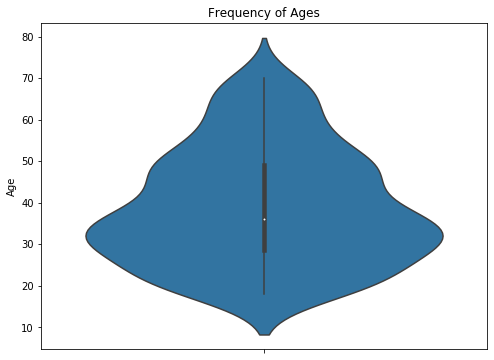

In [8]:
plt.figure(figsize=(8,6))
plt.title("Frequency of Ages")
sns.axes_style("white")
sns.violinplot(y=df["Age"])
plt.show()

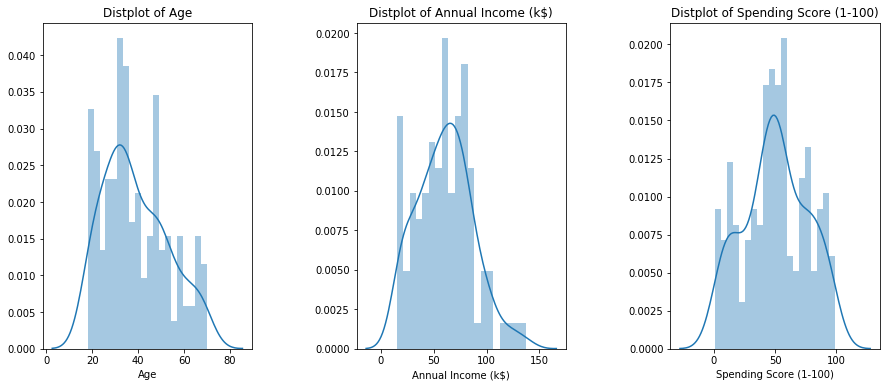

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

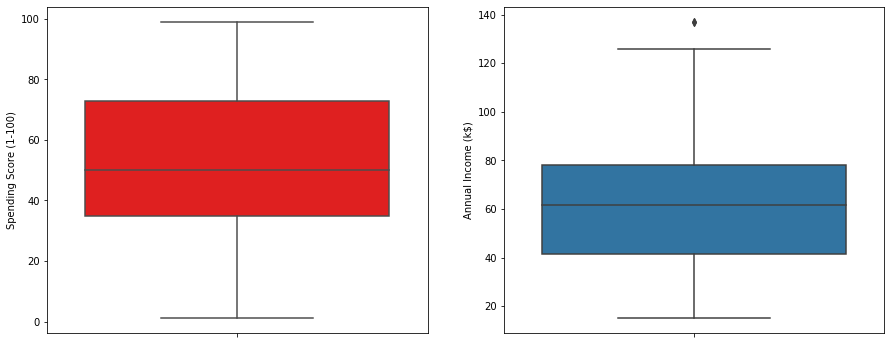

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

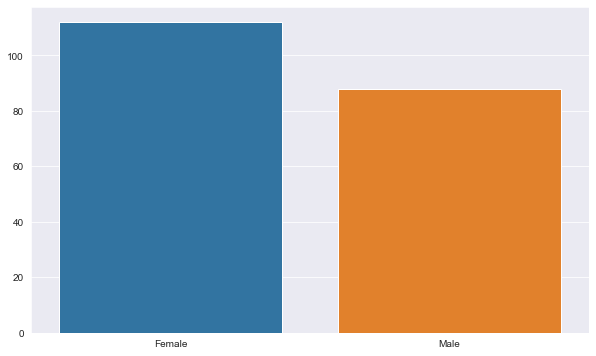

In [30]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

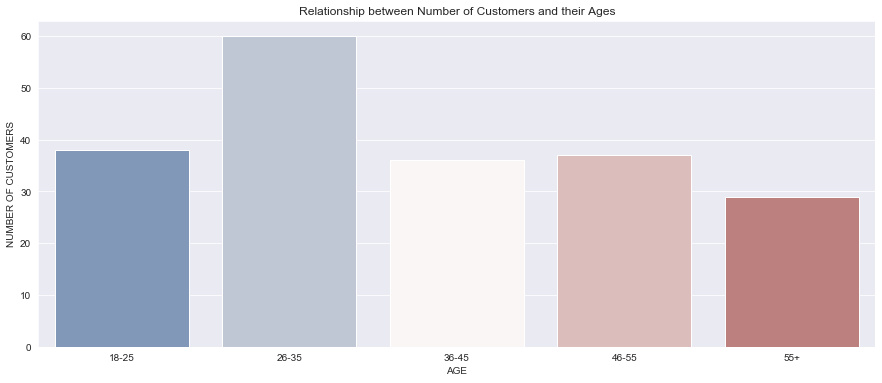

In [34]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="vlag")
plt.title("Relationship between Number of Customers and their Ages")
plt.xlabel("AGE")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.show()

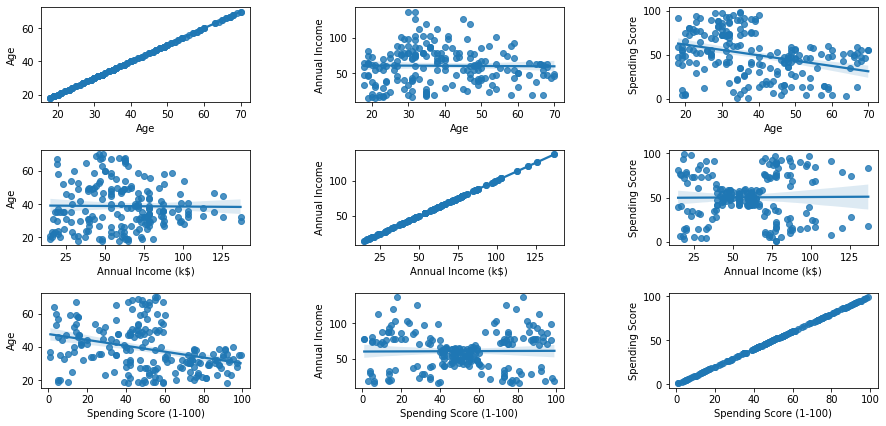

In [10]:
#RELATION BETWEEN AGE, ANNUAL INCOME AND SPENDING SCORE

plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

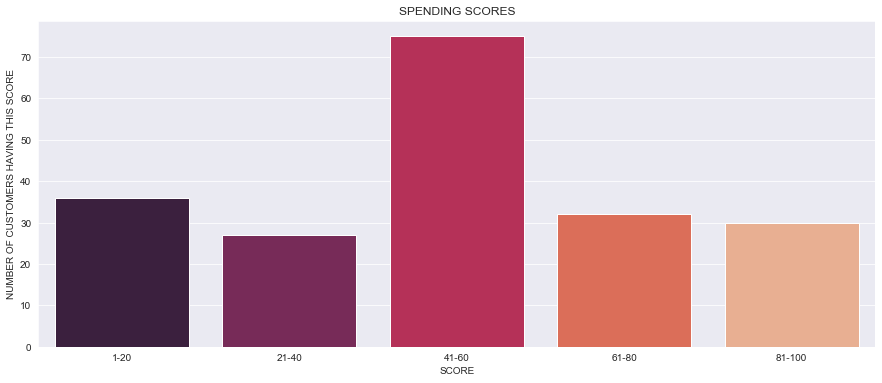

In [35]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("SPENDING SCORES")
plt.xlabel("SCORE")
plt.ylabel("NUMBER OF CUSTOMERS HAVING THIS SCORE")
plt.show()

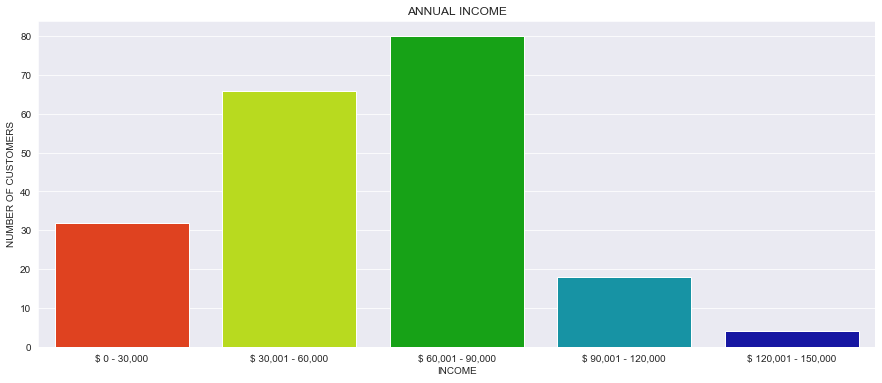

In [36]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="nipy_spectral_r")
plt.title("ANNUAL INCOME")
plt.xlabel("INCOME")
plt.ylabel("NUMBER OF CUSTOMERS")
plt.show()

In [11]:
#Distribution of values in Age , Annual Income and Spending Score according to Gender

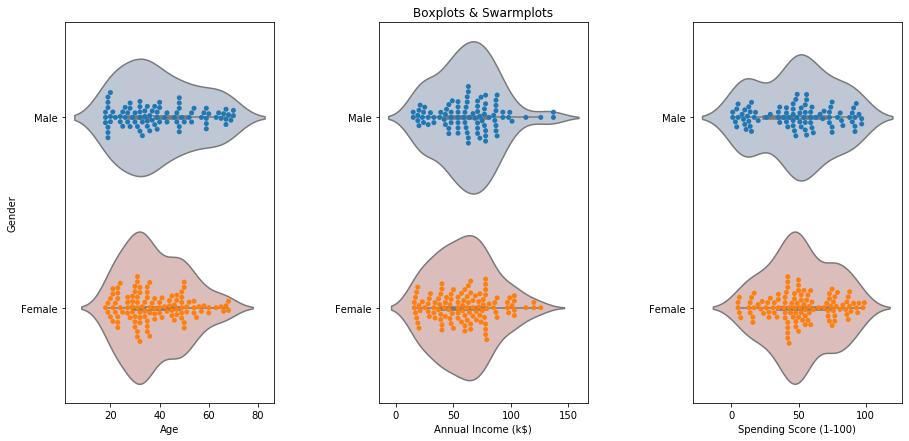

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

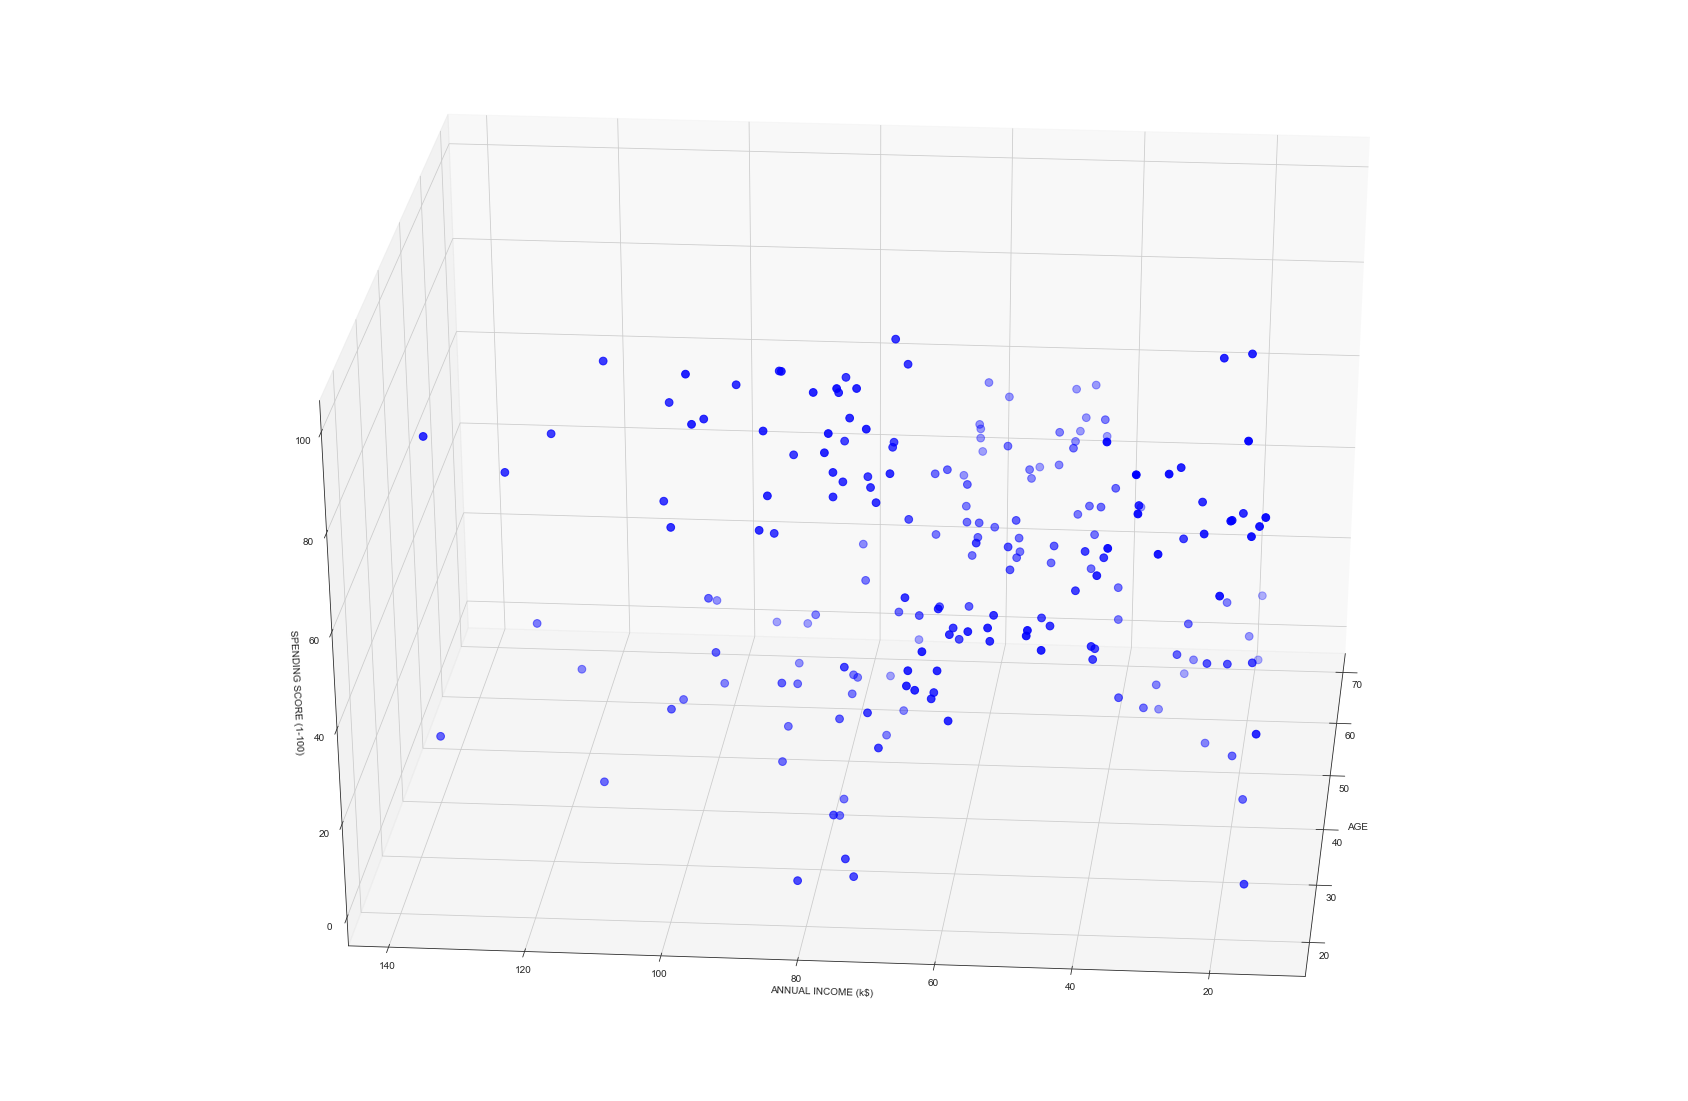

In [42]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("AGE")
plt.ylabel("ANNUAL INCOME (k$)")
ax.set_zlabel('SPENDING SCORE (1-100)')
plt.show()

# Applying K-Means Clustering Algorithm

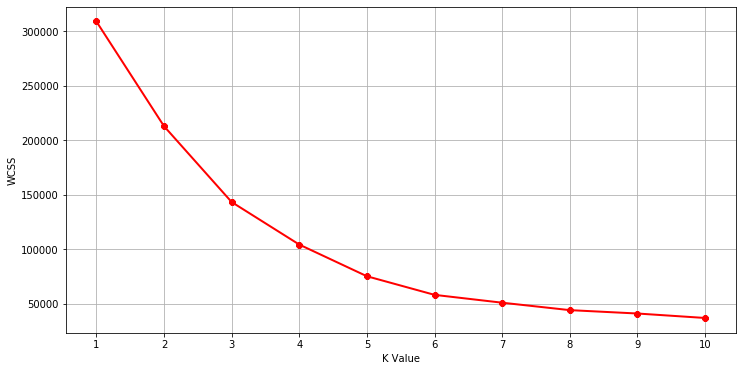

In [14]:

from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

# Segmentation using Annual Income And Spending Score

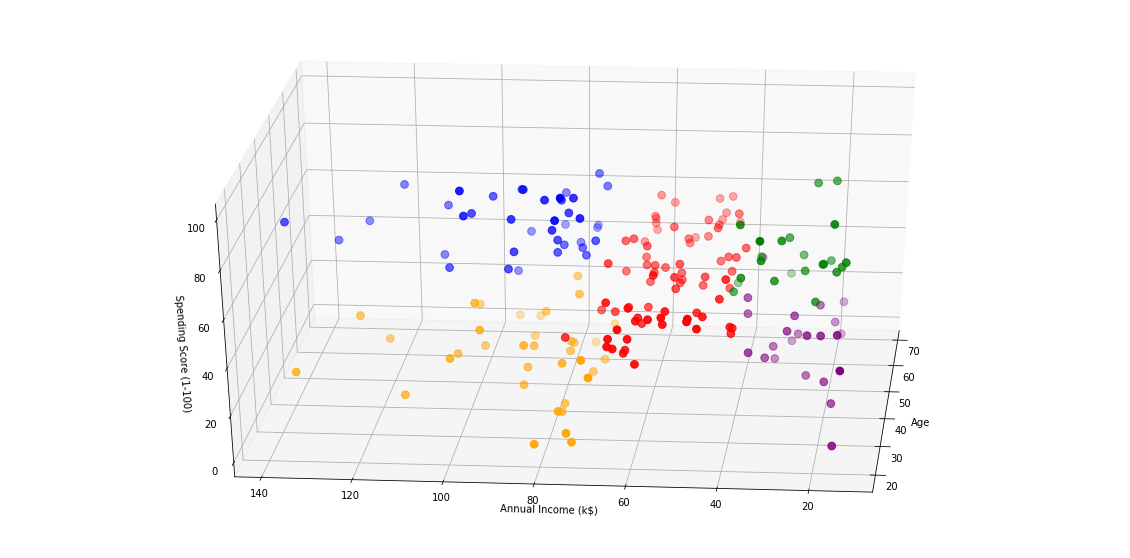

In [15]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# Another type of Segmentation using Age, Annual Income and Spending Score using Inertia Algorithm in K-Means

In [25]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

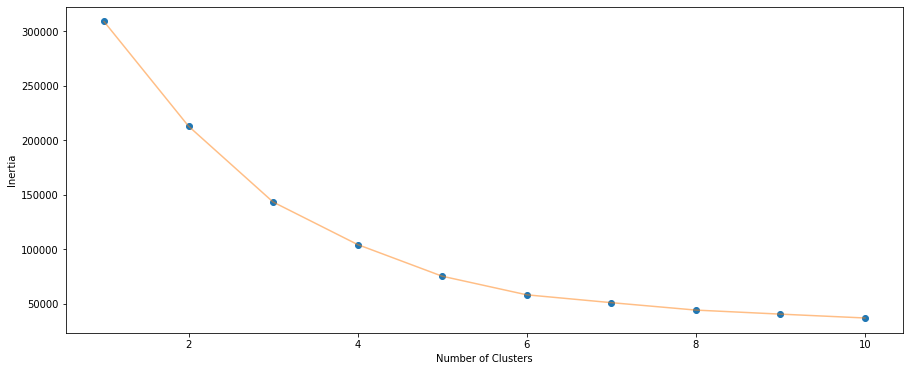

In [26]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [27]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [29]:
import plotly as py
import plotly.graph_objs as go
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)